# Rdkit|最大公共子结构

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw

## `rdFMCS.FindMCS`
- `mols`: 分子对象
- `maximizeBonds`一个结构由原子和键组成。默认True情况下，MCS查找的目标是让键的数量最大化，相当于让环的数量最大化。最大化键的数量时，会使环的数量最大化，但也可能出现两个小环键的数量不如一个大环多的情况。可以通过将maximizeBonds参数设为False来取消设置。 
- `threshold`:线程数，默认:1
- `timeout`:超时时间，默认:3600,MCS算法会穷尽每一种可能，寻找到一个最大的公共子结构。一般情况下说，该算法几秒内就能完成，但是有时也会花很长时间甚至花几分钟。这时，可以使用timeout参数来规定最大搜索时长，到达指定时长仍没有搜索完时，会返回现有的最优结果，并将canceled属性设置为True。该参数单位为秒。
- `verbose`:输出日志，默认:False
- `matchValences`：即忽略化合价信息，默认False。假设要考虑化合价信息，例如不想让一个3价氮与一个5价氮匹配上，那就可以将该参数改为True。
- `ringMatchesRingOnly`: 默认为False，这种情况下，线性的碳链可能会匹配上一个环。如果只想让环相互匹配，可以将该参数设置为True。
- `completeRingsOnly`:如果只想要能够完整匹配上的环，而不想要匹配一半的环，可以将该参数设置为True。默认False。
- `matchChiralTag`: 是否匹配立体化学。默认忽略立体化学：False。如果matchChiralTag为 True，则算法有两处变化：
     - 具有指定手性的原子只能匹配其他具有指定手性的原子
     - 如果 MCS 在指定手性的原子周围包含至少三个原子，则所有分子中的手性必须匹配。
- `atomCompare`：原子匹配方式
    - `CompareElements`：默认值，原子类型一样才算匹配。
    - `CompareIsotopes`：同位素一样才算匹配（根据同位素标签的值。这个值可以由用户自己定义）。
    - `CompareAny`: 表示任意原子之间都能匹配（找公共骨架）。
- `bondCompare`: 键匹配方式
    - `CompareOrderExact`：当且仅当键的类型完全一致才相等（芳香键和双键是不相等的）。
    - `CompareOrder`：默认值为该方法。允许单键和芳香键相互匹配。
    - `CompareAny`：任意键之间都可以匹配
- `ringCompare`：环匹配方式
- `seedSmarts`： 随机种子

该函数返回一个MCSResult实例，实例含有以下属性：
- `MCSResult.queryMol`: 搜索到结构的mol对象 
- `MCSResult.numAtoms`: 搜索到结构的原子数
- `MCSResult.numBonds`: 搜索到结构的键数量
- `MCSResult.smartsString`: 搜索到结构的smarts
- `MCSResult.canceled`: 搜索是否超时    

In [2]:
rdFMCS.FindMCS?

Docstring:
FindMCS( (AtomPairsParameters)mols [, (bool)maximizeBonds=True [, (float)threshold=1.0 [, (int)timeout=3600 [, (bool)verbose=False [, (bool)matchValences=False [, (bool)ringMatchesRingOnly=False [, (bool)completeRingsOnly=False [, (bool)matchChiralTag=False [, (AtomCompare)atomCompare=rdkit.Chem.rdFMCS.AtomCompare.CompareElements [, (BondCompare)bondCompare=rdkit.Chem.rdFMCS.BondCompare.CompareOrder [, (RingCompare)ringCompare=rdkit.Chem.rdFMCS.RingCompare.IgnoreRingFusion [, (str)seedSmarts='']]]]]]]]]]]]) -> MCSResult :
    Find the MCS for a set of molecules

    C++ signature :
        RDKit::MCSResult* FindMCS(boost::python::api::object [,bool=True [,double=1.0 [,unsigned int=3600 [,bool=False [,bool=False [,bool=False [,bool=False [,bool=False [,RDKit::AtomComparator=rdkit.Chem.rdFMCS.AtomCompare.CompareElements [,RDKit::BondComparator=rdkit.Chem.rdFMCS.BondCompare.CompareOrder [,RDKit::RingComparator=rdkit.Chem.rdFMCS.RingCompare.IgnoreRingFusion [,std::string='']]]]]

## 参数

## `bondCompare`

[#6](:,-[#6]:,-[#6]:,-[#6]):,-[#6]:,-[#6]
[#6]1:,-[#6]:,-[#6]:,-[#6]:,-[#6]:,=[#6]:,-1
[#6]


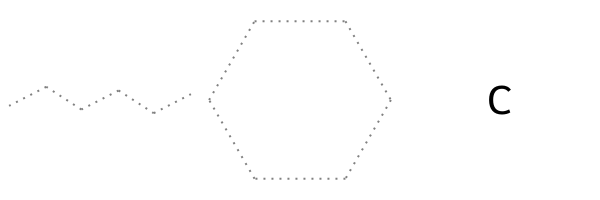

In [3]:
mols = [Chem.MolFromSmiles('c1ccccc1'),Chem.MolFromSmiles('C1CCCC=C1')]
results = []
res = rdFMCS.FindMCS(mols)
print(res.smartsString)
results.append(Chem.MolFromSmarts(res.smartsString))
res = rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny)
print(res.smartsString)
results.append(Chem.MolFromSmarts(res.smartsString))
res = rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareOrderExact)
print(res.smartsString) # 结果为空
results.append(Chem.MolFromSmarts(res.smartsString))

Draw.MolsToImage(results)

### `atomCompare`


[#7,#8]-[#6]
[#6]
[0*]-[0*]


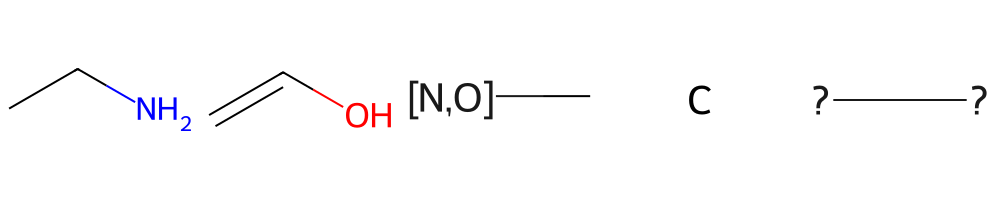

In [4]:
mols = (Chem.MolFromSmiles('NCC'),Chem.MolFromSmiles('OC=C'))
results = [Chem.MolFromSmiles('NCC'), Chem.MolFromSmiles('OC=C')]
res = rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny)
print(res.smartsString)
results.append(Chem.MolFromSmarts(res.smartsString))

res = rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareElements)
print(res.smartsString)
results.append(Chem.MolFromSmarts(res.smartsString))


res = rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareIsotopes)
print(res.smartsString)
results.append(Chem.MolFromSmarts(res.smartsString))


Draw.MolsToImage(results)

### `matchValences`

4
3


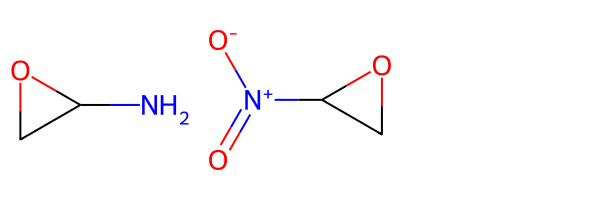

In [6]:
mols = (Chem.MolFromSmiles('NC1OC1'),Chem.MolFromSmiles('C1OC1[N+](=O)[O-]'))
print(rdFMCS.FindMCS(mols).numAtoms)

print(rdFMCS.FindMCS(mols, matchValences=True).numBonds)

Draw.MolsToGridImage(mols)


### `ringMatchesRingOnly`


7
4


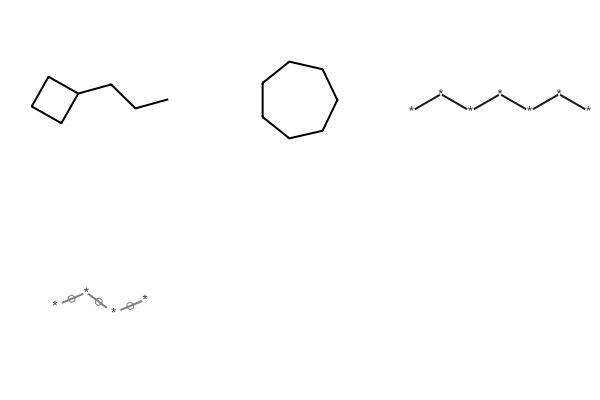

In [7]:
mols = [Chem.MolFromSmiles("C1CCC1CCC"), Chem.MolFromSmiles("C1CCCCCC1")]
res1 = rdFMCS.FindMCS(mols)
print(res1.numAtoms)

res2 = rdFMCS.FindMCS(mols, ringMatchesRingOnly=True)
print(res2.numAtoms)

mols += [res1.queryMol, res2.queryMol]
Draw.MolsToGridImage(mols)


### `completeRingsOnly`


[#6]1-&@[#6]-&@[#6]-&@[#6]-&@1


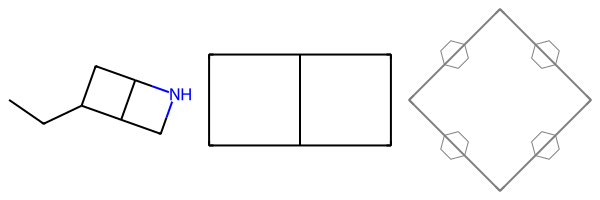

In [10]:
mols = [Chem.MolFromSmiles("CCC1CC2C1CN2"), Chem.MolFromSmiles("C1CC2C1CC2")]
res = rdFMCS.FindMCS(mols, completeRingsOnly=True).smartsString
print(res)
Draw.MolsToImage(mols+[Chem.MolFromSmarts(res)])


### matchChiralTag

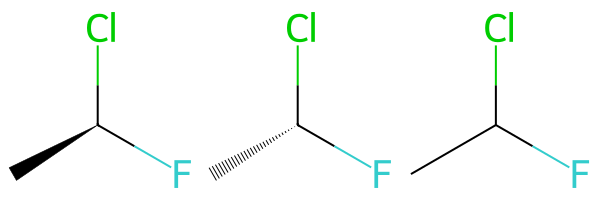

In [11]:
# 这是一个具有 的分子@，一个具有 的分子@@，以及一个其中立体未指定的分子。
ms = [Chem.MolFromSmiles(x) for x in ('C[C@H](F)Cl','C[C@@H](F)Cl','CC(F)Cl')]
Draw.MolsToGridImage(ms)

[#6]-[#6](-[#9])-[#17]
[#17]
[#6]-[#6]-[#17]


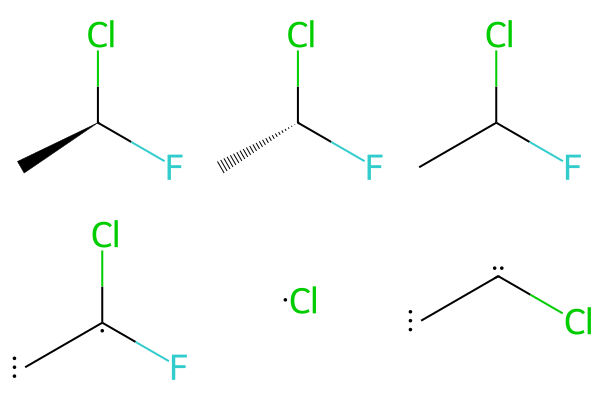

In [14]:
# 默认的 MCS 正是您所期望的 - 每个原子都匹配：
res = rdFMCS.FindMCS(ms)
print(res.smartsString)
results = ms
results = results + [Chem.MolFromSmiles(res.smartsString)]

## 如果我们使用第一个分子和最后一个分子的 MCS matchChiralTag，我们只会得到一个原子（你得到的原子不是先验明显的）：
## 这是因为中心 C 原子不再匹配，因为它在第一个分子中指定了手性，而在最后一个分子中指定了未指定的手性。
res = rdFMCS.FindMCS((ms[0],ms[2]),matchChiralTag=True)
print(res.smartsString)
results = results + [Chem.MolFromSmiles(res.smartsString)]

## 另一方面，如果我们对第一个和第二个分子进行 MCS，我们会得到三原子结果：
## 这里中心碳可以匹配，因为它们在两个分子中都具有指定的手性。但我们只能匹配中心碳的两个邻居，因为当我们添加第三个邻居时，实际的手性本身就开始重要。
res = rdFMCS.FindMCS((ms[0],ms[1]),matchChiralTag=True)
print(res.smartsString)
results = results + [Chem.MolFromSmiles(res.smartsString)]

Draw.MolsToGridImage(results)

## 高亮分子的不同子结构


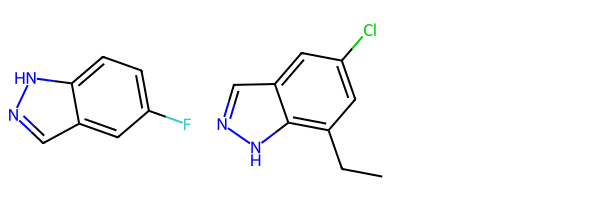

In [15]:
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')
Draw.MolsToGridImage([mol1, mol2])

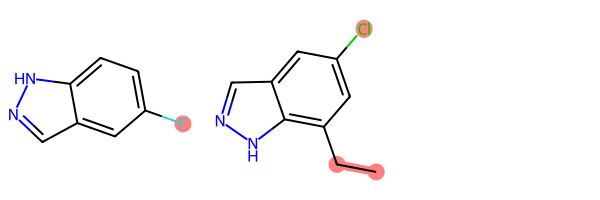

In [16]:
## 定义比较分子不同的方法：
mcs = rdFMCS.FindMCS([mol1,mol2])
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
match1 = mol1.GetSubstructMatch(mcs_mol)

target_atm1 = []
for atom in mol1.GetAtoms():
    if atom.GetIdx() not in match1:
        target_atm1.append(atom.GetIdx())
        
match2 = mol2.GetSubstructMatch(mcs_mol)
target_atm2 = []
for atom in mol2.GetAtoms():
    if atom.GetIdx() not in match2:
        target_atm2.append(atom.GetIdx())
        
Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])